In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Getting the datast from Google Drive and implementing it for the project.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls /content/drive/MyDrive/BrainT/Brain_tumors_629

Testing  Training


In [8]:
datagen=ImageDataGenerator()

train_it=datagen.flow_from_directory("/content/drive/MyDrive/BrainT/Brain_tumors_629/Training",target_size=(100,100),class_mode='categorical',batch_size=32,shuffle=True)

test_it=datagen.flow_from_directory("/content/drive/MyDrive/BrainT/Brain_tumors_629/Testing",target_size=(100,100),class_mode='categorical',batch_size=32,shuffle=False)

Found 2880 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [9]:
2880/32 # to find number of cycles in an Epoch.

90.0

In [10]:
from collections import Counter
Counter(train_it.labels)

Counter({0: 826, 1: 822, 2: 405, 3: 827})

In [11]:
train_it.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

## Load the first batch

In [12]:
batchX,batchy=train_it.next()

In [13]:
batchX,batchy=test_it.next()

In [14]:
batchX.shape,batchy.shape

((32, 100, 100, 3), (32, 4))

In [15]:
batchX.shape
# 32: number of samples (images)
# 100: x axis
# 100: y axis
# 3: colors, 3(RGB)

(32, 100, 100, 3)

In [16]:
batchX[20,:,:,:].shape

(100, 100, 3)

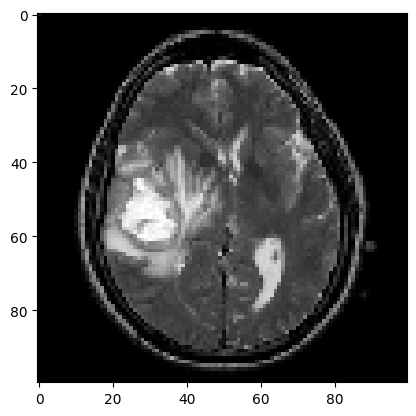

In [17]:
import matplotlib.pyplot as plt # This is to show an example of a brain scan with a tumor
plt.imshow(batchX[20,:,:,:]/255)

### Train Model

In [18]:
tf.__version__

NameError: ignored

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [20]:
model=Sequential()
model.add(Conv2D(8,3,input_shape=batchX.shape[1:],activation='relu'))
model.add(Conv2D(8,3,activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(16,3,activation='relu'))
model.add(Conv2D(16,3,activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,3,activation='relu'))
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 16)        1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 16)       0         
 2D)                                                    

In [22]:
# optimizer: sgd, rmsprop, adam

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.fit(train_it,validation_data=test_it,epochs=25)

Epoch 1/25
90/90 [==============================] - 594s 7s/step - loss: 1.4992 - accuracy: 0.4997 - val_loss: 1.7435 - val_accuracy: 0.3452
Epoch 2/25
90/90 [==============================] - 16s 178ms/step - loss: 0.7077 - accuracy: 0.7080 - val_loss: 1.6667 - val_accuracy: 0.4924
Epoch 3/25
90/90 [==============================] - 16s 178ms/step - loss: 0.5365 - accuracy: 0.7878 - val_loss: 1.6047 - val_accuracy: 0.5533
Epoch 4/25
90/90 [==============================] - 16s 176ms/step - loss: 0.3705 - accuracy: 0.8660 - val_loss: 1.8218 - val_accuracy: 0.6599
Epoch 5/25
90/90 [==============================] - 17s 189ms/step - loss: 0.2614 - accuracy: 0.9045 - val_loss: 2.1331 - val_accuracy: 0.6523
Epoch 6/25
90/90 [==============================] - 16s 177ms/step - loss: 0.1918 - accuracy: 0.9295 - val_loss: 1.8571 - val_accuracy: 0.6954
Epoch 7/25
90/90 [==============================] - 17s 190ms/step - loss: 0.1217 - accuracy: 0.9587 - val_loss: 2.4032 - val_accuracy: 0.7081
E

## Test Set metrics

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
y_test=test_it.classes

In [28]:
y_pred_test=model.predict(test_it).argmax(1)

13/13 [==============================] - 3s 191ms/step


In [29]:
accuracy_score(y_test,y_pred_test)

0.7715736040609137

In [30]:
confusion_matrix(y_test,y_pred_test) # TP, TN, FP, FN

array([[ 21,  25,  44,  10],
       [  0, 112,   3,   0],
       [  0,   0, 105,   0],
       [  0,   5,   3,  66]])

### We see that the model reached a maximum accuracy of .77 from the 16th Epoch onwards.The training accuracy was 100% and therfor it would be difficult to achieve a higher accuracy unless other parameters were changed. This model can Identify the tumor and correct class in 3/4 MRI scans.
